Loading data...
Data loaded.
Training Teacher Model
Epoch: 20/200..  Training loss: 12288.56250..  Reg Proj: 0.00000..  Reg Latent: 0.14238..  Memory: 12287.13867..  Cost: 12288.56250.. 
Epoch: 40/200..  Training loss: 7867.11377..  Reg Proj: 0.00000..  Reg Latent: 0.09330..  Memory: 7866.18066..  Cost: 7867.11377.. 
Epoch: 60/200..  Training loss: 7935.85303..  Reg Proj: 0.00000..  Reg Latent: 0.30760..  Memory: 7932.77686..  Cost: 7935.85303.. 
Epoch: 80/200..  Training loss: 10401.28516..  Reg Proj: 0.00000..  Reg Latent: 0.58695..  Memory: 10395.41602..  Cost: 10401.28516.. 
Epoch: 100/200..  Training loss: 8836.78027..  Reg Proj: 0.00000..  Reg Latent: 0.24193..  Memory: 8834.36133..  Cost: 8836.78027.. 
Epoch: 120/200..  Training loss: 7478.96973..  Reg Proj: 0.00000..  Reg Latent: 0.03057..  Memory: 7478.66406..  Cost: 7478.96973.. 
Epoch: 140/200..  Training loss: 8551.74902..  Reg Proj: 0.00000..  Reg Latent: 0.15945..  Memory: 8550.15430..  Cost: 8551.74902.. 
Epoch: 160/200.

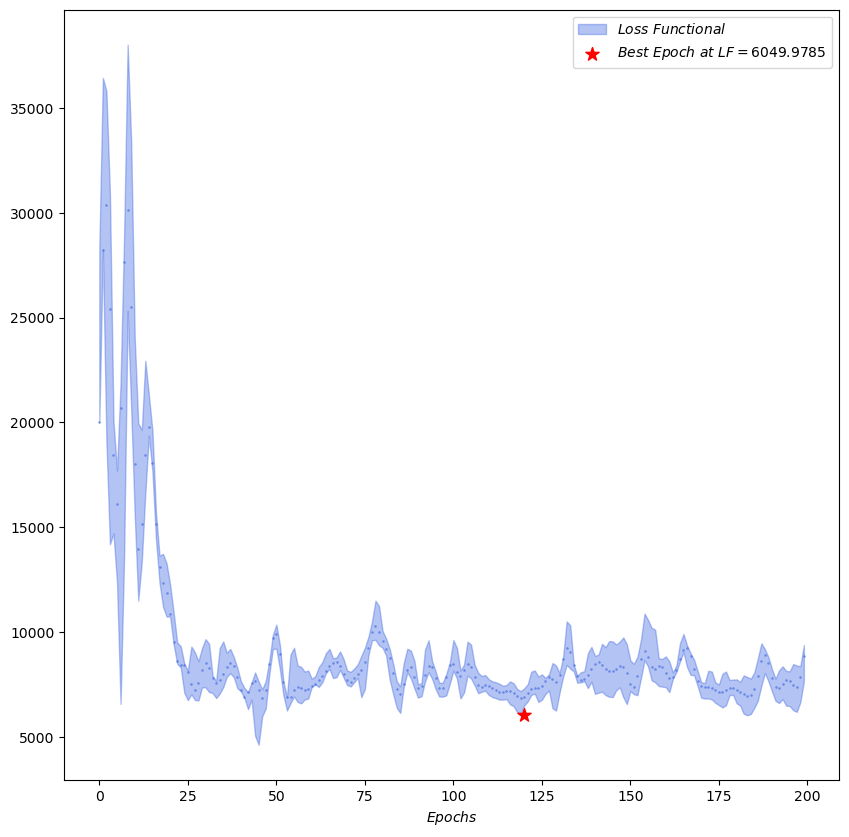

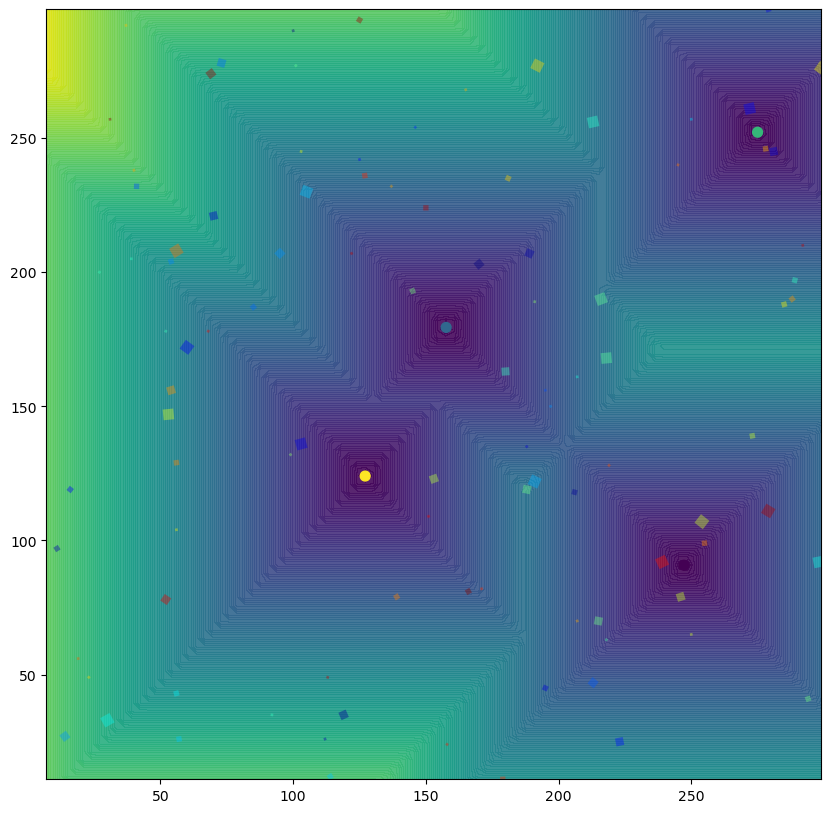

Processing...
flag is 4120
m is 5881
i is 10000


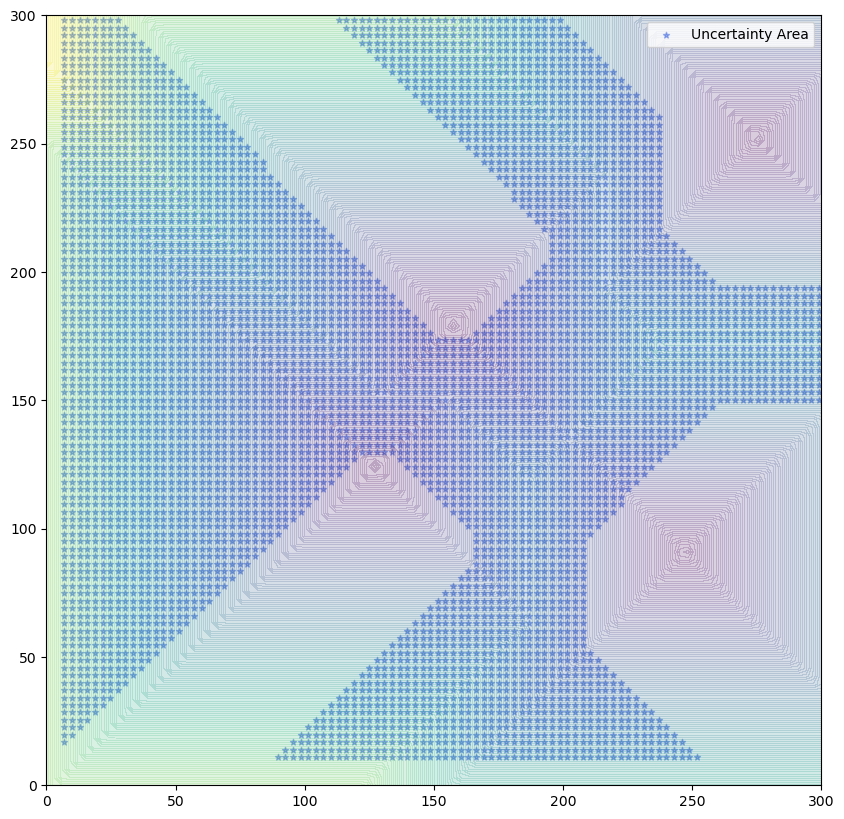

Labeled 0/5881 points.
Labeled 1000/5881 points.
Labeled 2000/5881 points.
Labeled 3000/5881 points.
Labeled 4000/5881 points.
Labeled 5000/5881 points.
Labeled all 5881/5881 points.


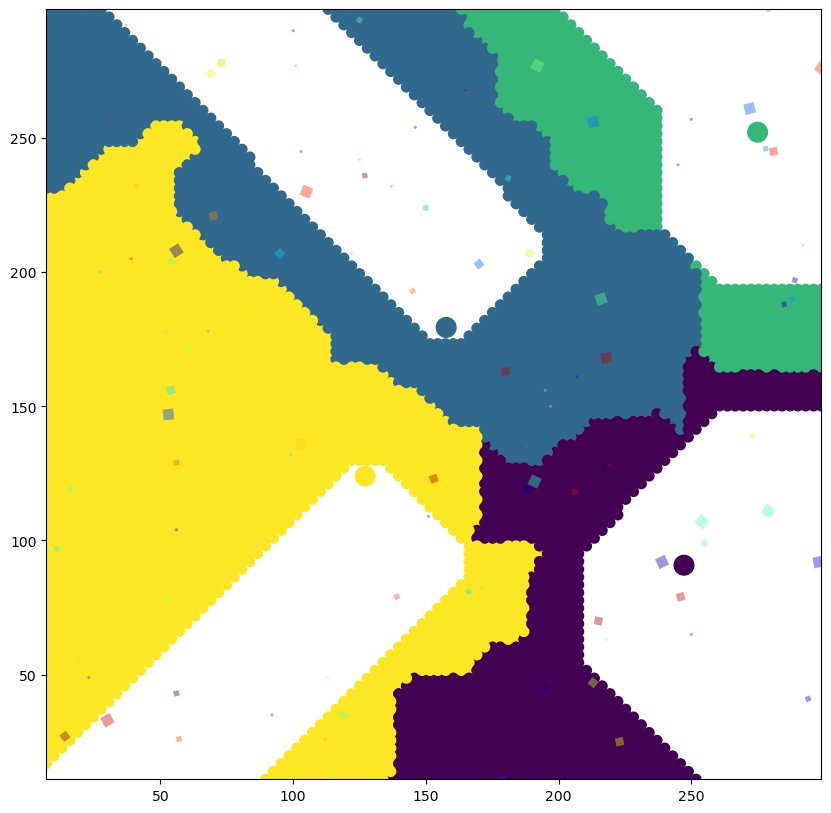

Training Student Model
Acc:  0.3004591055942867
Epoch:  0 Cost:  2149.391357421875
Acc:  0.9267131440231253
Epoch:  2000 Cost:  26.618497848510742
Acc:  0.965482060874001
Epoch:  4000 Cost:  16.727384567260742
Acc:  0.9336847474919231
Epoch:  6000 Cost:  15.883345603942871
Acc:  0.9287536133310661
Epoch:  8000 Cost:  15.115398406982422
Acc:  0.9476279544295187
Epoch:  10000 Cost:  12.17712116241455
Acc:  0.9790851895936066
Epoch:  12000 Cost:  9.065202713012695
Acc:  0.9564699880972624
Epoch:  14000 Cost:  10.223199844360352
Acc:  0.9814657371195374
Epoch:  16000 Cost:  8.000870704650879
Acc:  0.95068865839143
Epoch:  18000 Cost:  10.235450744628906
Acc:  0.928243496004081
Epoch:  20000 Cost:  14.658186912536621
Acc:  0.9646318653290257
Epoch:  22000 Cost:  7.999930381774902
Acc:  0.96276143513008
Epoch:  24000 Cost:  8.50892162322998
Acc:  0.9685427648359123
Epoch:  26000 Cost:  6.977819442749023
Acc:  0.9682026866179221
Epoch:  28000 Cost:  6.741663932800293
Saved student config to m

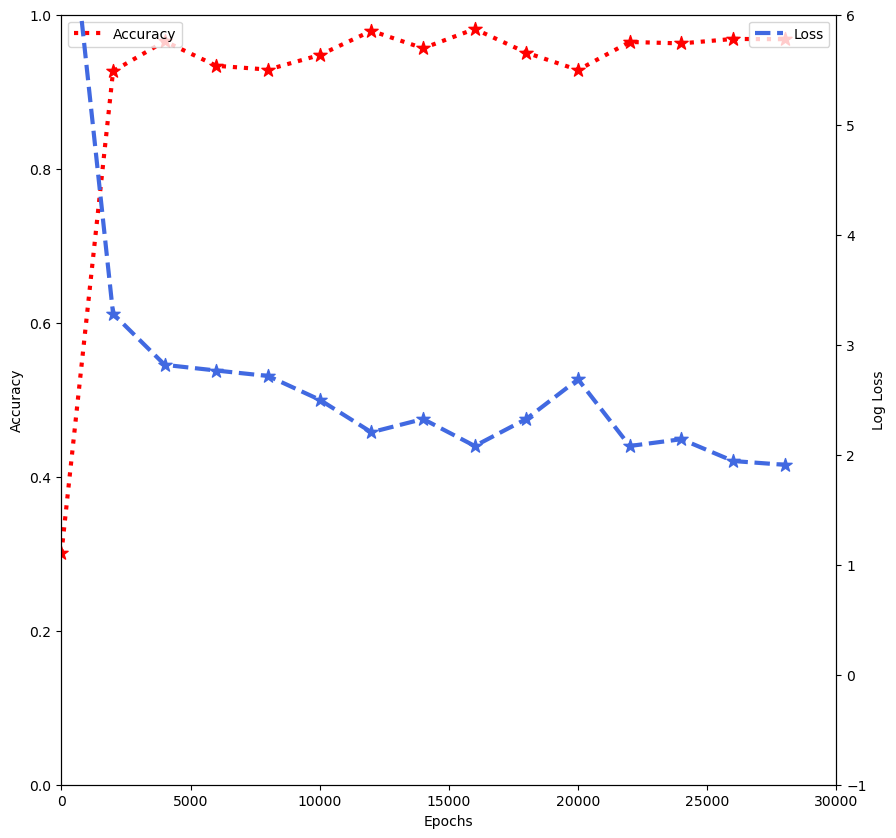

In [1]:
import torch
from src.quadtree import QuadTree
from src.utils.data import loadData

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data, _ = loadData(100)

learning_rate = 1e-2
teacher_args = {
    "optimizer_lr": learning_rate,
    "epochs": 200,
    "times": 10,
    "train_data": torch.from_numpy(data).float().to(device),
    "alpha": 5,
    "beta": 10
}
un_args = {
    "N": 100,
    "M": 10000 - 1,
    "epsilon": 0.15
}
student_args = {
    "optimizer_lr": 1e-3,
    "epochs": 30000,
}

quadtree = QuadTree(10, data, teacher_args, un_args, student_args)
quadtree.root.create_student(save_path_prefix="models/squares/100/class", plot=True)

In [2]:
# Print a student prediction both using the student model from training
# and the student model loaded from config. The two outputs should be equal.
query = torch.tensor([[4., 2.], [2., 0.]])

pred_trained = quadtree.root.student(query)
print(pred_trained)

# Recreate the student mddel from config.
quadtree.root.student = None
quadtree.root.create_student_from_config("models/squares/100/class_student_config.pt")
pred_config = quadtree.root.student(query)
print(pred_config)

print("Predictions are " + "equal." if torch.equal(pred_trained, pred_config) else "NOT equal.")

tensor([[ -34.5831, -105.1675, -109.2798,   71.0329],
        [ -42.6225, -104.4026, -103.9531,   66.3565]],
       grad_fn=<AddmmBackward0>)
tensor([[ -34.5831, -105.1675, -109.2798,   71.0329],
        [ -42.6225, -104.4026, -103.9531,   66.3565]],
       grad_fn=<AddmmBackward0>)
Predictions are equal.
